# Job 1 - Results analysis

In this notebook are analyzed the results of Job 1.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = "../../../full-output/part-00000-b80873a3-39b1-449a-abc8-742bdc92b74b-c000.csv"
df = pd.read_csv(DATA_PATH)
# Clean types
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')
df = df.dropna(subset=['year','state','response_strategy','avg_rating'])


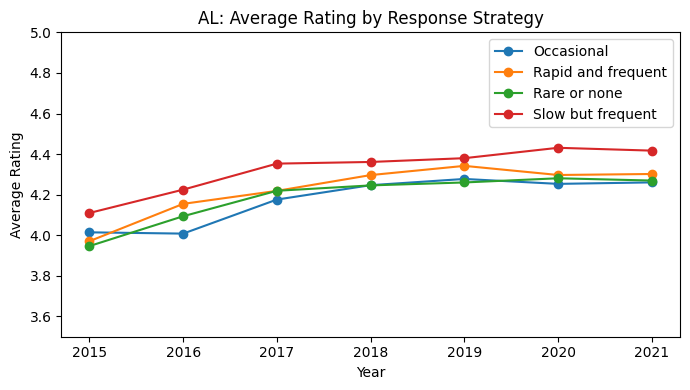

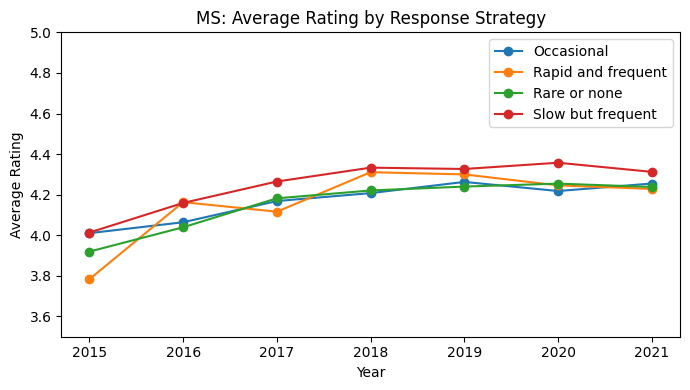

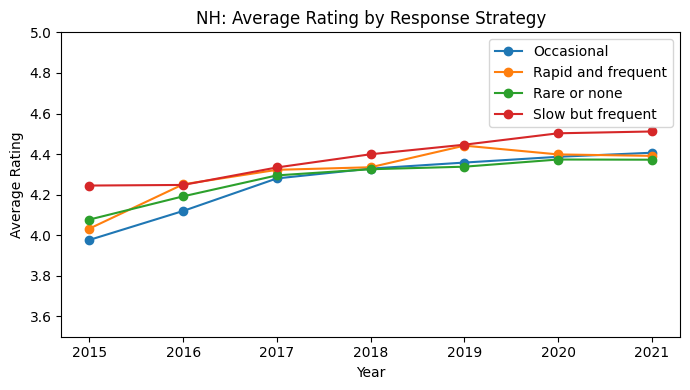

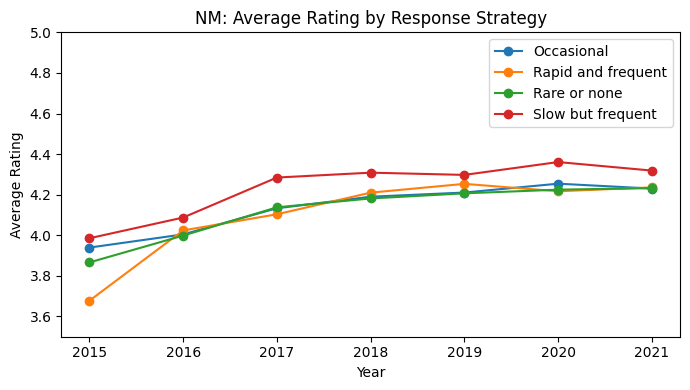

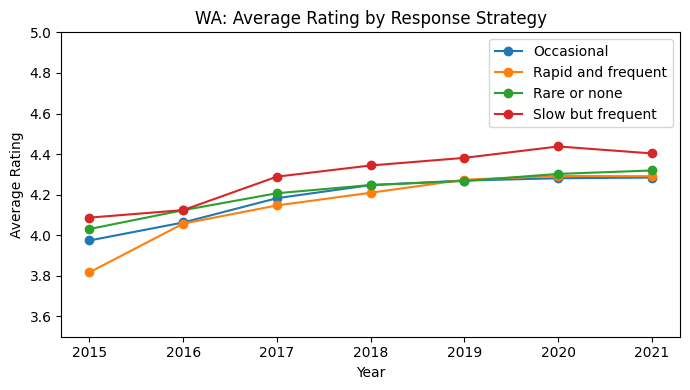

In [5]:
def plot_state_trends(state_code):
    sub = df[df['state']==state_code]
    if sub.empty:
        print(f"No data for {state_code}")
        return
    
    means = sub.groupby(['year','response_strategy'])['avg_rating'].mean().reset_index()

    plt.figure(figsize=(7,4))
    for strat, grp in means.groupby('response_strategy'):
        plt.plot(grp['year'], grp['avg_rating'], marker='o', label=strat)
    
    plt.title(f"{state_code}: Average Rating by Response Strategy")
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.ylim(3.5, 5)  # optional: keep scale consistent
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_state_trends("AL")
plot_state_trends("MS")
plot_state_trends("NH")
plot_state_trends("NM")
plot_state_trends("WA")